<a href="https://colab.research.google.com/github/viviennejuma/-Nairobi_Hospital_Hypothyroidism_test/blob/main/Thyroid_regression_techniques.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Nairobi Hospital Hypothyroidism test
# Defining the Question
>Nairobi Hospital conducted a clinical camp to test for hypothyroidism. Hypothyroidism is an abnormally low activity of the thyroid gland, resulting in retardation of growth and mental development in children and adults. The data collected focused on Thyroid patients

# Specifying the Question
>Build a model that determines whether or not the patient's symptoms indicate that the patient has hypothyroid.

#Defining the Metric of Success
>Optimal and reliable prediction Model of the sale of prices 80% Accuracy score of the four models that I will use in prediction With the least RMSE score achievable

#Understanding the Context
>Experimental Desing taken
##Part 1: Decision trees:

>For this section, you should build a model that makes the above prediction. You should not use individual decision trees, rather you should use at least 2 out of the 3 advanced models we have studied: Random forests, Ada boosted trees, and gradient boosted trees.
>Try and optimize each of the 2 models, making sure to document how you've set up your hyperparameters.
>Identify which of the 2 models you trust most, and use your model to determine which features are most impactful in influencing the prediction
>Note that with decision trees, you don't need to do a lot of data cleaning. This will be very different with SVM.
##Part 2: SVM:

>In this section, you may be required to clean the data a little bit so as to make sense of the features.

>Document what transformation you've done on the data.

>Apply Polynomial, linear and rbf kernel function to build your SVM model and then evaluate their performance and pick the kernel that performs the best.
>Remember to tune your parameters to improve the performance of your model. To make your life easier, make sure to visualize the models you've created. Use any two features to build the models for this step.

>Hint: You may want to use decision trees to give you the most preferable features you can use. but also keep in mind that those features might not be suitable for SVM. It might be a good idea to graph them first.

>After getting your best performing kernel, use this kernel together with your tuned parameters and repeat the prediction but this time using additional features. Compare the model you've just created with the 2-features version.
>Appropriateness of Data
One datasets is provided by the consulting company:

>The dataset and glossary to use for this project can be found here Datasets

# Reading data

In [ ]:
# Importing necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#loading the dataset and previewing the first five elements
thyroid = pd.read_csv('http://bit.ly/hypothyroid_data')
thyroid.head(5)

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,M,f,f,f,f,f,f,f,f,f,f,f,y,30,y,0.60,y,15,y,1.48,y,10,n,?
1,hypothyroid,15,F,t,f,f,f,f,f,f,f,f,f,f,y,145,y,1.70,y,19,y,1.13,y,17,n,?
2,hypothyroid,24,M,f,f,f,f,f,f,f,f,f,f,f,y,0,y,0.20,y,4,y,1,y,0,n,?
3,hypothyroid,24,F,f,f,f,f,f,f,f,f,f,f,f,y,430,y,0.40,y,6,y,1.04,y,6,n,?
4,hypothyroid,77,M,f,f,f,f,f,f,f,f,f,f,f,y,7.30,y,1.20,y,57,y,1.28,y,44,n,?


In [ ]:
# Checking our data
def look_at_data(dataset):
    print('*'*100)
    print(dataset.info())
    print('*'*100)
    print(f'The shape is {dataset.shape} and the size is {dataset.size}')
    print('*'*100)
    print('The dataset has the following missing values::', thyroid.isnull().sum())
look_at_data(thyroid)

****************************************************************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3163 entries, 0 to 3162
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   status                     3163 non-null   object
 1   age                        3163 non-null   object
 2   sex                        3163 non-null   object
 3   on_thyroxine               3163 non-null   object
 4   query_on_thyroxine         3163 non-null   object
 5   on_antithyroid_medication  3163 non-null   object
 6   thyroid_surgery            3163 non-null   object
 7   query_hypothyroid          3163 non-null   object
 8   query_hyperthyroid         3163 non-null   object
 9   pregnant                   3163 non-null   object
 10  sick                       3163 non-null   object
 11  tumor                      3163 non-null   object
 12  lithium          

In [ ]:
# previewing the columns of the datasets
thyroid.columns

Index(['status', 'age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured', 'TT4',
       'T4U_measured', 'T4U', 'FTI_measured', 'FTI', 'TBG_measured', 'TBG'],
      dtype='object')

In [ ]:
# The sick status column is created
# 

sick_euthyroid = ['sick-euthyroid' for i in range(151)]
negative = ['negative' for i in range(3012)]

sick_status = sick_euthyroid + negative


In [ ]:
# Adding Column to the thyroid dataset
# 
thyroid['sick_status'] = sick_status
thyroid.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,sick_status
0,hypothyroid,72,M,f,f,f,f,f,f,f,f,f,f,f,y,30,y,0.60,y,15,y,1.48,y,10,n,?,sick-euthyroid
1,hypothyroid,15,F,t,f,f,f,f,f,f,f,f,f,f,y,145,y,1.70,y,19,y,1.13,y,17,n,?,sick-euthyroid
2,hypothyroid,24,M,f,f,f,f,f,f,f,f,f,f,f,y,0,y,0.20,y,4,y,1,y,0,n,?,sick-euthyroid
3,hypothyroid,24,F,f,f,f,f,f,f,f,f,f,f,f,y,430,y,0.40,y,6,y,1.04,y,6,n,?,sick-euthyroid
4,hypothyroid,77,M,f,f,f,f,f,f,f,f,f,f,f,y,7.30,y,1.20,y,57,y,1.28,y,44,n,?,sick-euthyroid


In [ ]:
# Checking for duplicates
#
thyroid.duplicated().sum()

77

In [ ]:
# Removing duplicates
# Keeping every first data point of the duplicated datapoints
#
thyroid.drop_duplicates(keep='first', inplace = True)

# Checking to confirm whether duplicates have been dropped
#
thyroid.duplicated().any()

False

In [ ]:
# Replacing the '?' character in the dataframe with NAN
#

thyroid.replace('?', np.nan, inplace=True)

In [ ]:
thyroid.isnull().sum()

status                          0
age                           438
sex                            73
on_thyroxine                    0
query_on_thyroxine              0
on_antithyroid_medication       0
thyroid_surgery                 0
query_hypothyroid               0
query_hyperthyroid              0
pregnant                        0
sick                            0
tumor                           0
lithium                         0
goitre                          0
TSH_measured                    0
TSH                           455
T3_measured                     0
T3                            680
TT4_measured                    0
TT4                           240
T4U_measured                    0
T4U                           239
FTI_measured                    0
FTI                           238
TBG_measured                    0
TBG                          2835
sick_status                     0
dtype: int64

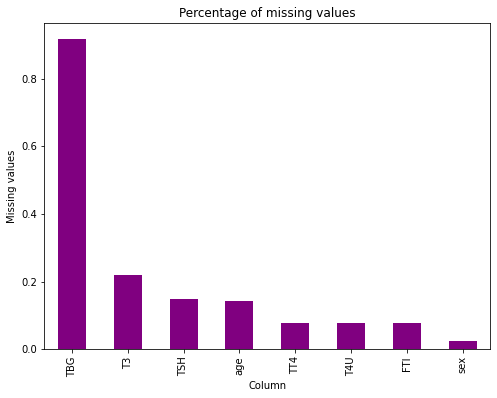

In [ ]:
# Visualising missing values
#
thyroid.isna().mean().round(4).sort_values(ascending = False)[:8].plot(kind = 'bar', figsize = (8, 6), color = 'purple')
plt.title('Percentage of missing values')
plt.ylabel('Missing values')
plt.xlabel('Column')
plt.show()

The tbg column has more than 91% missing values, therefore it will be dropped, the missing values in the sex column will be filled with the mode and all other missing values in numerical columns will be filled with their mean

In [ ]:
# Checking for missing values as a percentage
# Sorting the missing values in a descending order
#
(thyroid.isna().mean().round(4) * 100).sort_values(ascending = False)

TBG                          91.87
T3                           22.03
TSH                          14.74
age                          14.19
TT4                           7.78
T4U                           7.74
FTI                           7.71
sex                           2.37
sick_status                   0.00
pregnant                      0.00
on_thyroxine                  0.00
query_on_thyroxine            0.00
on_antithyroid_medication     0.00
thyroid_surgery               0.00
query_hypothyroid             0.00
query_hyperthyroid            0.00
goitre                        0.00
sick                          0.00
tumor                         0.00
lithium                       0.00
TSH_measured                  0.00
T3_measured                   0.00
TT4_measured                  0.00
T4U_measured                  0.00
FTI_measured                  0.00
TBG_measured                  0.00
status                        0.00
dtype: float64

In [ ]:
thyroid.status.value_counts()
# It can easily be seen that the number of samples of the sick-euthyroid class is 151 # while the number of samples of the negative class is 3012. 
# We can now create a column for sick status

negative       2945
hypothyroid     141
Name: status, dtype: int64

In [ ]:
# replacing values and variables
thyroid = thyroid.replace({'f' : 0, 't' : 1})
thyroid = thyroid.replace({'n' : 0, 'y' : 1})
thyroid.head(3)

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,sick_status
0,hypothyroid,72,M,0,0,0,0,0,0,0,0,0,0,0,1,30,1,0.60,1,15,1,1.48,1,10,0,NaN,sick-euthyroid
1,hypothyroid,15,F,1,0,0,0,0,0,0,0,0,0,0,1,145,1,1.70,1,19,1,1.13,1,17,0,NaN,sick-euthyroid
2,hypothyroid,24,M,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0.20,1,4,1,1,1,0,0,NaN,sick-euthyroid


In [ ]:
# Convert variable sick_status and sex to values of 0 and 1
thyroid['sick_status'] = thyroid['sick_status'].map({'negative': 0, 'sick-euthyroid': 1})
thyroid['sex'] = thyroid['sex'].map({'F': 0, 'M': 1})

In [ ]:
# Replacing the '?' character in the dataframe with NAN
#

thyroid.replace('?', np.nan, inplace=True)

In [ ]:
# using apply method  
thyroid[['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI' ]] =thyroid[['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI']].apply(pd.to_numeric)

In [ ]:
# Filling missing values in the sex column with mode
#
thyroid.sex.fillna(thyroid.sex.mode()[0], inplace = True)

# Filling missing values in numerical columns with mean
# A for loop has been used for efficiency
#
num_cols = ['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI']

for column in num_cols:
  thyroid[column].fillna(thyroid[column].mean(), inplace = True)

In [ ]:

###the columns are not uniform,,,for uniformity I'll need to convert them to lower case
thyroid.columns = map(str.lower, thyroid.columns)
thyroid.head()
#lowered our columns to lowercase

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,tsh_measured,tsh,t3_measured,t3,tt4_measured,tt4,t4u_measured,t4u,fti_measured,fti,tbg_measured,tbg,sick_status
0,hypothyroid,72.0,1.0,0,0,0,0,0,0,0,0,0,0,0,1,30.0,1,0.6,1,15.0,1,1.48,1,10.0,0,NaN,1
1,hypothyroid,15.0,0.0,1,0,0,0,0,0,0,0,0,0,0,1,145.0,1,1.7,1,19.0,1,1.13,1,17.0,0,NaN,1
2,hypothyroid,24.0,1.0,0,0,0,0,0,0,0,0,0,0,0,1,0.0,1,0.2,1,4.0,1,1.00,1,0.0,0,NaN,1
3,hypothyroid,24.0,0.0,0,0,0,0,0,0,0,0,0,0,0,1,430.0,1,0.4,1,6.0,1,1.04,1,6.0,0,NaN,1
4,hypothyroid,77.0,1.0,0,0,0,0,0,0,0,0,0,0,0,1,7.3,1,1.2,1,57.0,1,1.28,1,44.0,0,NaN,1


# EDA

## Univariate

This is the dependent variable which we are trying to predict.

The status column is binary where [ ' Hypothyroid ' ] indicates that the patient is sick

while [ ' negative ' ] indicates that the patient is healthy.


####Age
This column indicates the age of the patients

In [ ]:
#creating a copy
thyroid1 = thyroid

In [ ]:

#checking for null values
thyroid1.age.isnull().sum()

0

In [ ]:

thyroid1.age.nunique() 
#[93] There are 93 unique ages

93

In [ ]:
thyroid1.age.unique()
#The unique values are:

array([72.        , 15.        , 24.        , 77.        , 85.        ,
       64.        , 20.        , 42.        , 69.        , 75.        ,
       53.        , 59.        , 68.        , 50.        , 78.        ,
       65.        , 28.        , 43.        , 40.        , 84.        ,
       51.11253776, 83.        , 63.        , 73.        , 36.        ,
       27.        , 48.        , 71.        , 60.        , 34.        ,
       79.        , 62.        , 74.        , 32.        , 41.        ,
       70.        , 29.        ,  5.        , 58.        , 35.        ,
       51.        , 22.        , 16.        , 44.        , 39.        ,
       47.        , 18.        , 17.        , 88.        , 56.        ,
       30.        , 45.        , 66.        , 52.        , 54.        ,
       80.        , 33.        , 38.        , 92.        , 67.        ,
       46.        , 13.        , 89.        , 61.        , 49.        ,
       26.        , 57.        , 31.        , 90.        , 81.  

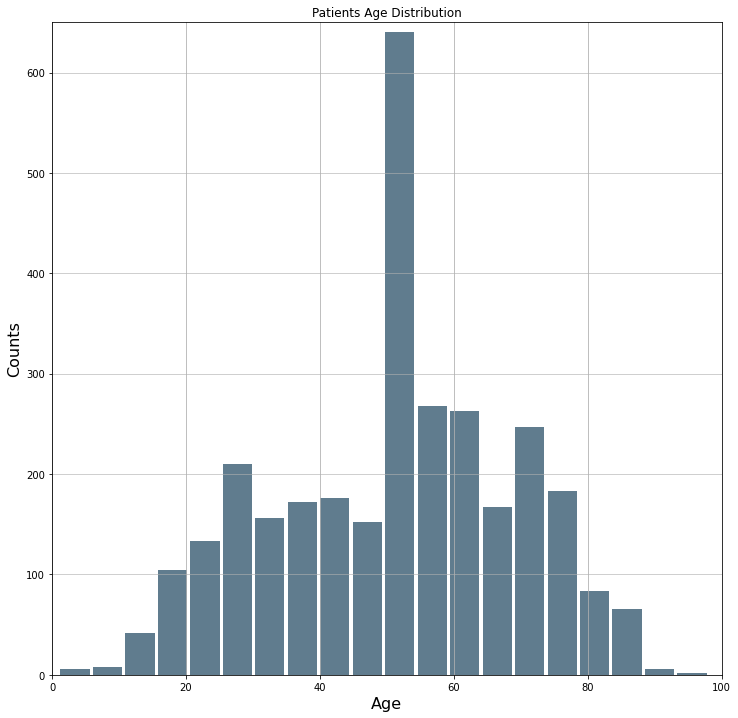

In [ ]:

#visualizing age dirstibution
size, scale = 1000, 10
age = thyroid1['age']

plt.figure(figsize=(12,12))
age.plot.hist(grid=True, bins=20, rwidth=0.9,
                   color='#607c8e')
plt.xlim(0,100)
plt.ylim(0,650)
plt.title('Patients Age Distribution')
plt.xlabel('Age', size = 16)
plt.ylabel('Counts',size = 16)
plt.grid(axis='y', alpha=0.75)

The distribution is fairly normal, and leptokurtic: the kurtosis is greater than normal.

The distribution is more concentrated around the mean

Text(0.5, 1.0, 'Boxplot of Age')

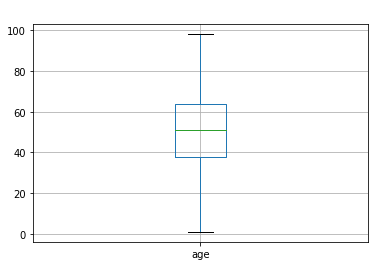

In [ ]:
#checking for outliers using a boxplot
thyroid1.boxplot(column=['age'])

plt.title("Boxplot of Age",size=16,color="white")

There are no outliers in the data



#### Sex
This column gives the gender of the patients in the dataset

In [ ]:
thyroid1.sex.nunique()
#there are 30 unique values
thyroid1.sex.describe()

count    3086.000000
mean        0.289695
std         0.453694
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: sex, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


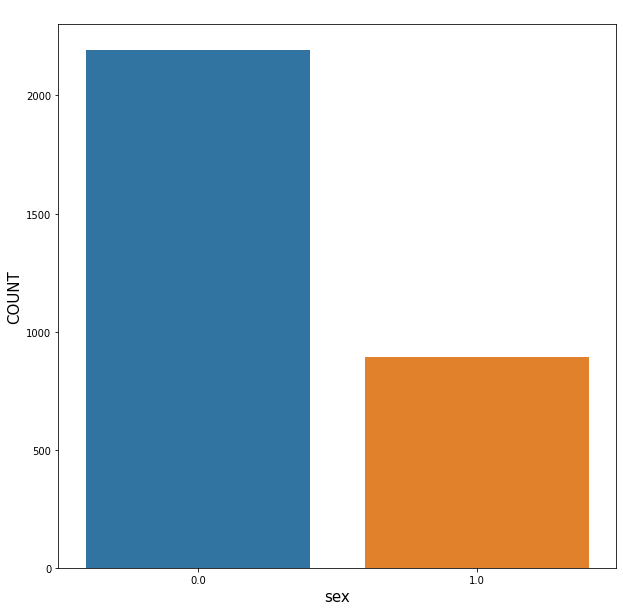

In [ ]:
#visualizing the distribution of gender in the dataset
plt.figure(figsize=(10, 10))
sns.countplot('sex',data = thyroid)
plt.xlabel("sex",fontsize=15)
plt.ylabel("COUNT",fontsize=15)
plt.title("Countplot of Gender",fontsize=16,color="white")
plt.show()
#


The female patients entries are more than double that of male patients: This may be because women are more prone to hypothyroidism than men.

#### Other Numerical Columns: TSH , T3 , TT4 , T4U , FTI
###Histograms

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

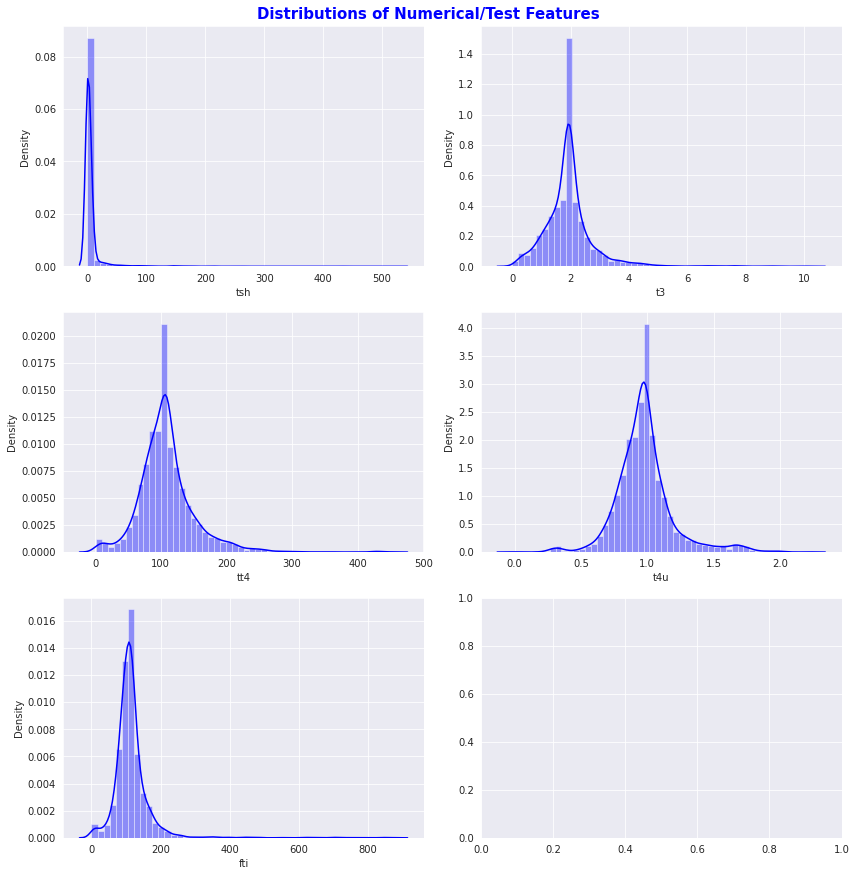

In [ ]:
# Histograms of the numerical columns
# these are columns represent the measures of the thyroid tests.

# First we create an array of the numerical columns
numerical_columns_3 = ['tsh','t3','tt4','t4u','fti']

#visualizing the distributions using histograms
sns.set_style('darkgrid')
fig, axes = plt.subplots(nrows=3, ncols = 2, figsize = (12, 12))
fig.suptitle('Distributions of Numerical/Test Features', y= 1.01, color = 'blue', fontsize = 15, weight = 'bold')

for ax, data, name in zip(axes.flatten(), thyroid, numerical_columns_3):
  sns.distplot(thyroid[name], ax = ax, kde = True, color = 'blue')
plt.tight_layout()
plt.show()

TSH, T3,TT4, and FT Columns are right skewed.

1.   List item
2.   List item



/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

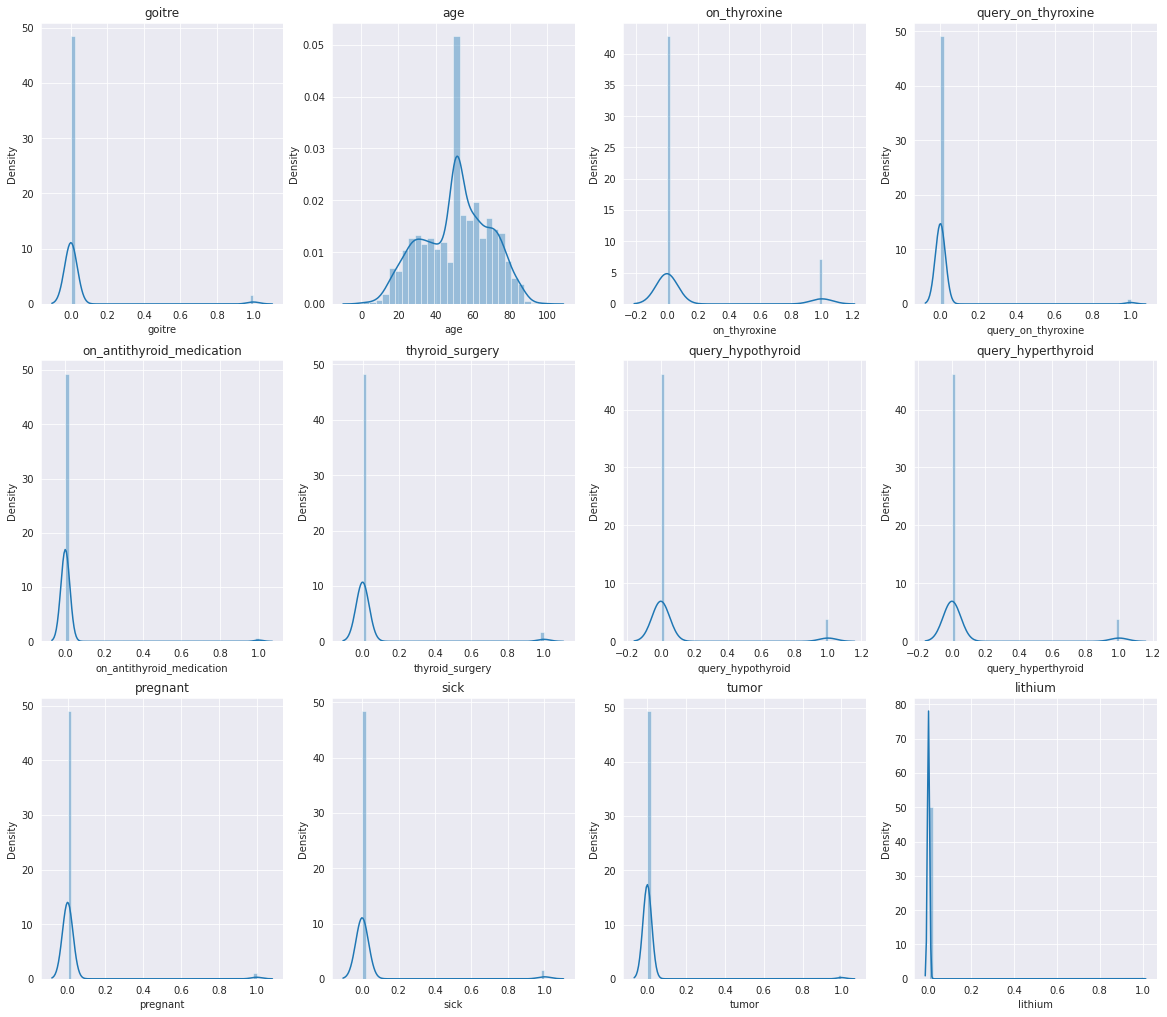

In [ ]:
columns_dict = {'goitre': 1, 'age': 2, 'on_thyroxine': 3, 'query_on_thyroxine': 4, 'on_antithyroid_medication': 5, 'thyroid_surgery': 6,
       'query_hypothyroid': 7, 'query_hyperthyroid': 8, 'pregnant': 9, 'sick': 10, 'tumor': 11, 'lithium': 12}
# Ploting the univariate summaries and recording our observations
# plot histograms for all numeric columns
# we use the dictionary we had earlier on saved
plt.figure(figsize = (20,30))
for variable,i in columns_dict.items():
  
  plt.subplot(5,4,i)
  sns.distplot(thyroid1[variable])
  plt.title(variable)

plt.show()

# this shows the relationship between the variables

Box plots

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

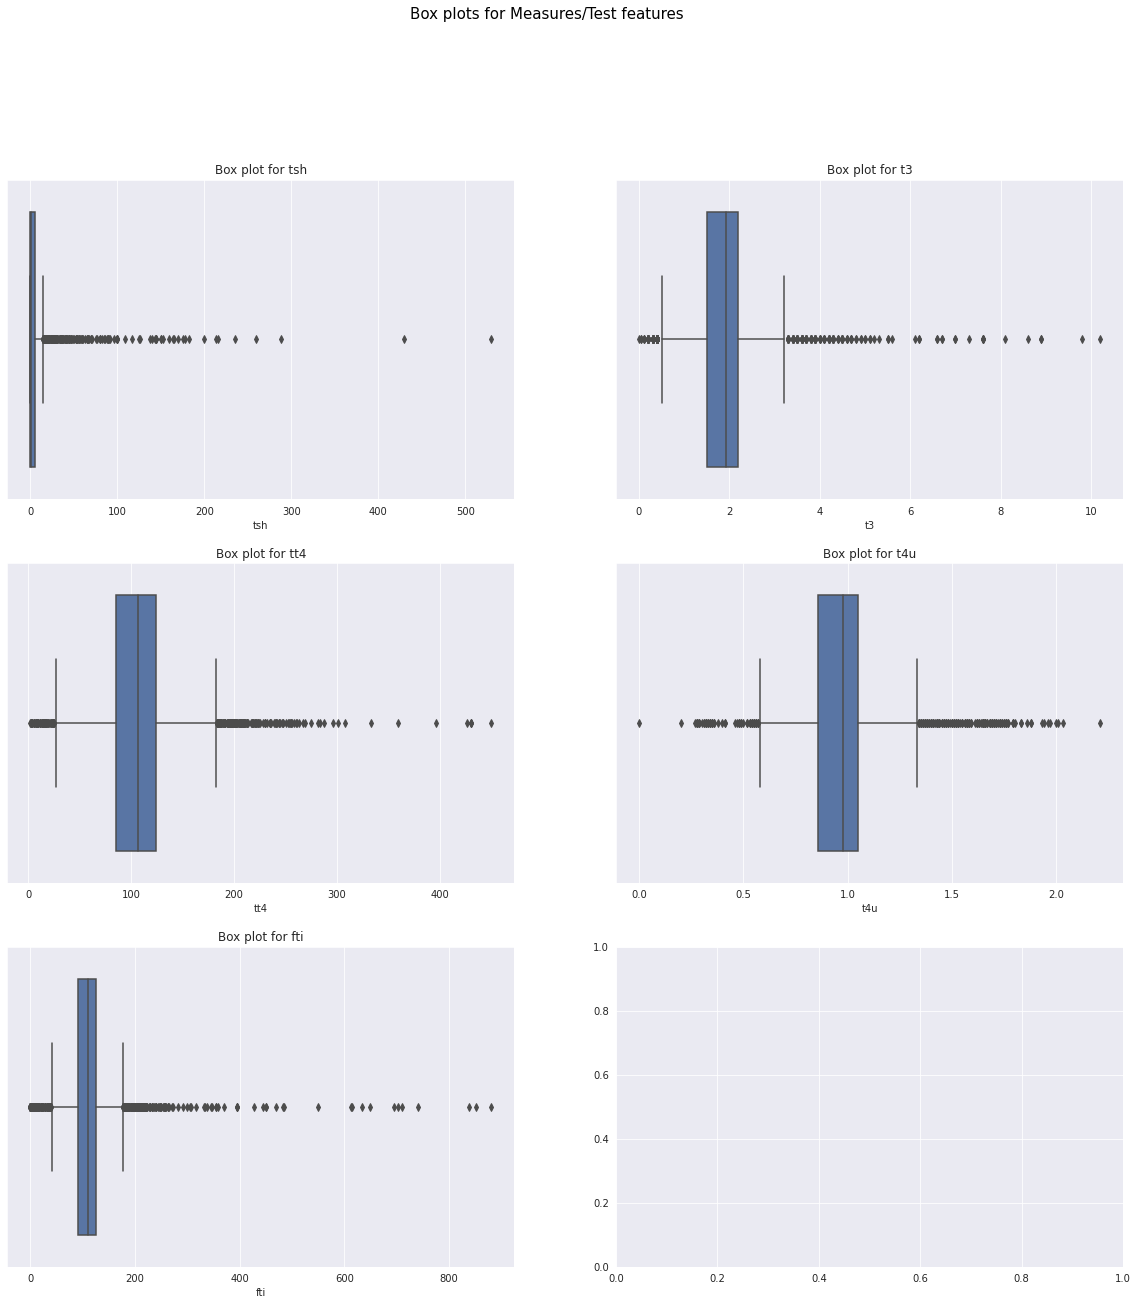

In [ ]:

# We will use a boxplot to check for outliers
# we will use the list of measures/tests earlier created

# Specifying the chart we will use to plot the boxplots
fig, axes = plt.subplots(nrows = 3, ncols = 2, figsize = (20, 20))

# labeling the title
fig.suptitle('Box plots for Measures/Test features', y= 1, color = 'black', fontsize = 15)

sns.set(style = 'whitegrid', context = 'notebook')

# Using a for loop to iterate through the measured list and plot respective boxplots
for ax, data, name in zip(axes.flatten(), thyroid1, numerical_columns_3):
  sns.boxplot(thyroid1[name], ax = ax)
  ax.set_title('Box plot for '+ name)
  
plt.show()

### Other Categorical Columns:
###Countplots

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

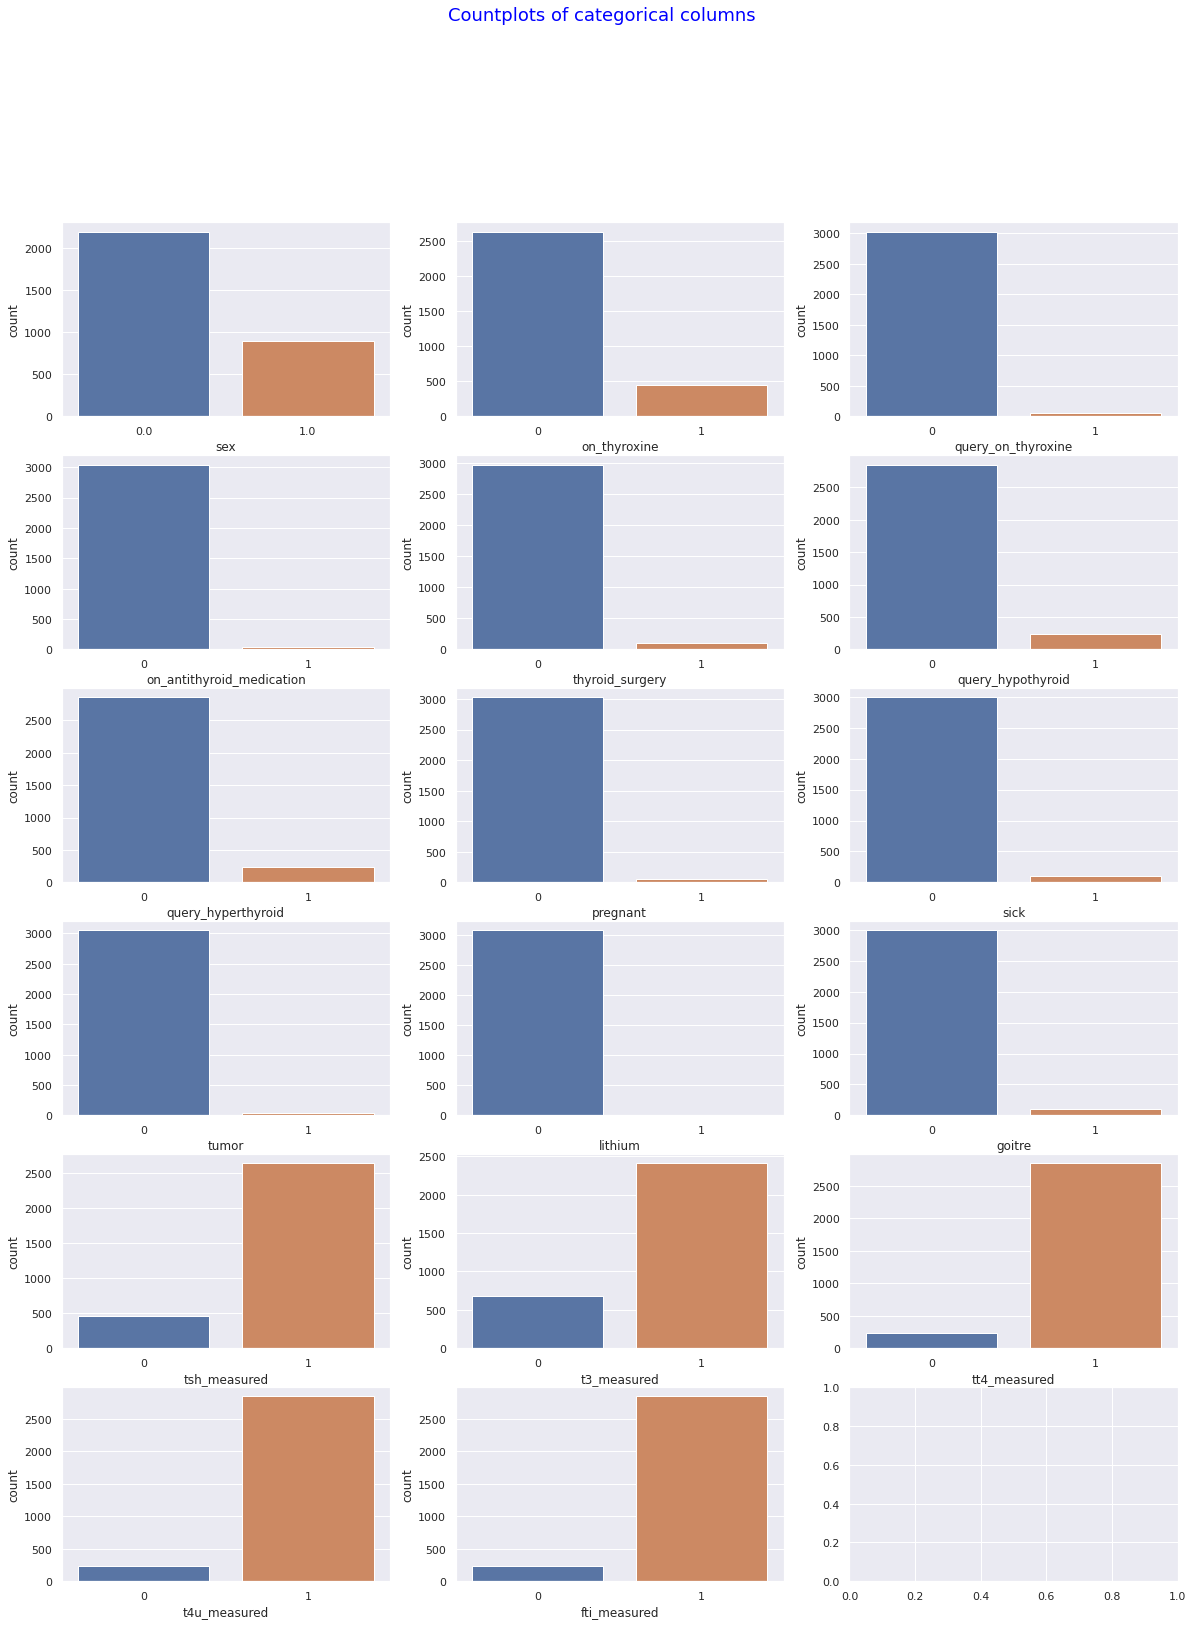

In [ ]:
# Countplot of categorical columns in the dataset
# creating a list of the categorical columns in the dataset

categorical_columns_1 =[ 'sex', 'on_thyroxine', 'query_on_thyroxine',
      'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
      'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
      'tsh_measured', 't3_measured', 'tt4_measured',
      't4u_measured', 'fti_measured']


sns.set(style = 'darkgrid', context = 'notebook')
corr = thyroid1.corr()
fig, axes = plt.subplots(nrows=6, ncols=3, figsize=(20,25))
plt.suptitle('Countplots of categorical columns', fontsize = 18, y = 1, color = 'blue')
for ax, data, column in zip(axes.flatten(), thyroid1, categorical_columns_1):
   sns.countplot(thyroid1[column], ax=ax)

# Bivariate Analysis

### Checking for multicollinearility

In [ ]:
# Let's display the correlations between the variables
corr = thyroid1.corr()
corr


,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,tsh_measured,tsh,t3_measured,t3,tt4_measured,tt4,t4u_measured,t4u,fti_measured,fti,tbg_measured,sick_status
age,1.000000,0.008346,0.000451,-0.019781,-0.059541,-0.012432,0.043156,-0.087005,-0.157715,0.063078,-0.063738,-0.021559,-0.036387,2.027883e-01,-7.351709e-03,1.769844e-01,-2.657425e-01,1.268219e-01,-8.631682e-02,1.244764e-01,-1.887859e-01,1.250483e-01,1.773686e-02,-0.129292,0.029975
sex,0.008346,1.000000,-0.118247,0.054353,-0.019527,-0.043106,-0.062156,-0.054076,-0.090688,0.024153,-0.003712,-0.016263,-0.089744,3.387231e-02,-3.484748e-02,9.822571e-02,-7.359567e-02,8.942875e-02,-1.691698e-01,8.882570e-02,-1.981428e-01,9.089841e-02,-7.500181e-02,-0.090718,-0.013161
on_thyroxine,0.000451,-0.118247,1.000000,-0.013574,-0.024418,0.031370,0.066144,-0.086734,0.001219,-0.063480,-0.022658,-0.010467,-0.025874,6.955339e-02,-5.256796e-03,-1.616968e-01,2.327889e-02,5.741790e-02,2.172758e-01,5.702951e-02,7.120897e-02,6.009429e-02,1.133502e-01,-0.061614,-0.036975
query_on_thyroxine,-0.019781,0.054353,-0.013574,1.000000,-0.015823,0.015876,-0.020206,-0.038674,-0.019129,-0.024267,0.049524,-0.003430,0.004078,-1.097744e-01,-1.467587e-02,-8.793145e-02,-1.513294e-02,3.911799e-02,-2.029387e-02,3.902955e-02,-3.474074e-02,3.894098e-02,-4.659149e-03,-0.040082,-0.029475
on_antithyroid_medication,-0.059541,-0.019527,-0.024418,-0.015823,1.000000,-0.006256,-0.033724,0.124440,0.003412,-0.021160,-0.013461,-0.002991,-0.021048,-3.003480e-02,-1.045211e-03,-1.852408e-02,6.562616e-02,-4.943343e-02,-2.744886e-03,-4.967044e-02,2.647929e-02,-4.990861e-02,-1.779705e-02,0.046900,-0.012309
thyroid_surgery,-0.012432,-0.043106,0.031370,0.015876,-0.006256,1.000000,0.001065,0.021470,-0.013427,-0.033475,-0.021294,-0.004732,-0.022904,3.656718e-02,1.216671e-02,7.382207e-03,-7.011530e-03,6.806249e-03,-1.612711e-02,6.594007e-03,2.607756e-02,6.380984e-03,-2.610487e-02,-0.009091,0.045738
query_hypothyroid,0.043156,-0.062156,0.066144,-0.020206,-0.033724,0.001065,1.000000,-0.017942,-0.014439,-0.051720,-0.032900,0.040694,-0.023296,5.047633e-02,6.691075e-02,-2.422225e-02,-3.898383e-02,3.775420e-02,-1.095520e-02,3.747841e-02,4.439329e-02,3.720175e-02,-4.627100e-02,-0.040733,0.048344
query_hyperthyroid,-0.087005,-0.054076,-0.086734,-0.038674,0.124440,0.021470,-0.017942,1.000000,0.073329,-0.051720,-0.032900,-0.007311,0.040038,-1.355999e-01,-2.291001e-02,-3.601245e-02,1.693254e-01,-9.453924e-02,1.310931e-01,-9.506823e-02,7.002441e-02,-9.559973e-02,6.328599e-02,0.106757,-0.021865
pregnant,-0.157715,-0.090688,0.001219,-0.019129,0.003412,-0.013427,-0.014439,0.073329,1.000000,-0.025581,0.004308,-0.003616,0.081827,6.525594e-03,-1.241512e-02,3.056135e-02,2.019603e-01,-2.225238e-03,1.712366e-01,-2.401648e-03,3.233287e-01,-2.578747e-03,-5.415269e-03,0.000328,-0.019924
sick,0.063078,0.024153,-0.063480,-0.024267,-0.021160,-0.033475,-0.051720,-0.051720,-0.025581,1.000000,-0.020644,-0.004588,-0.032279,4.872396e-02,-6.217587e-03,7.784726e-02,-1.032679e-01,3.150925e-02,-4.215426e-02,3.135117e-02,-4.771029e-02,3.119264e-02,-2.349841e-02,-0.033220,-0.021630


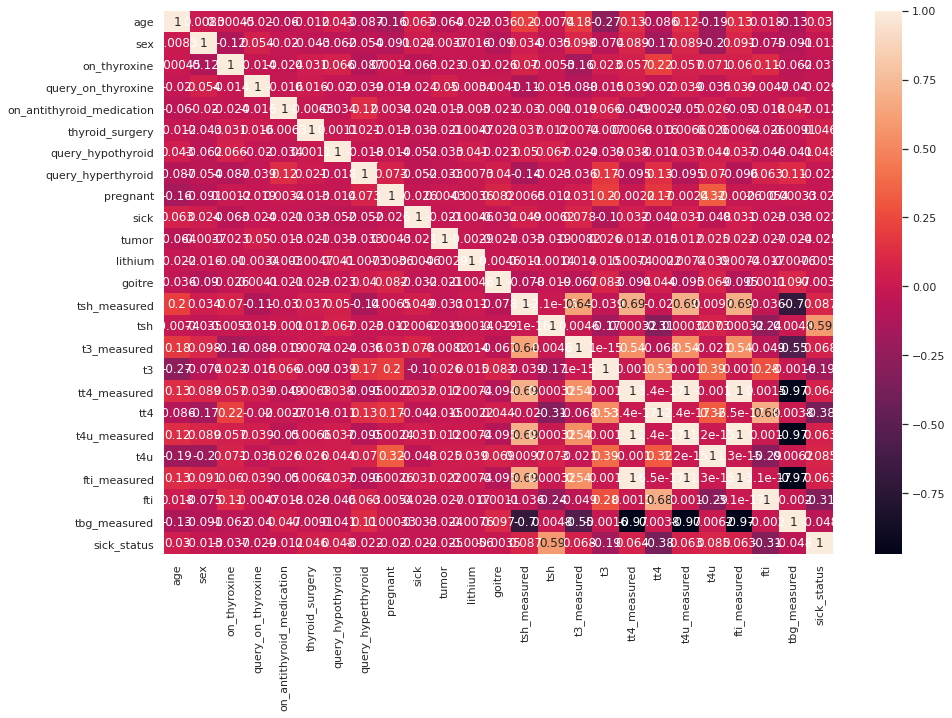

In [ ]:

#visualizing correlation on a heatmap
plt.figure(figsize=(15,10))
sns.heatmap(corr, annot = True)
plt.show()

# Multivariate analysis

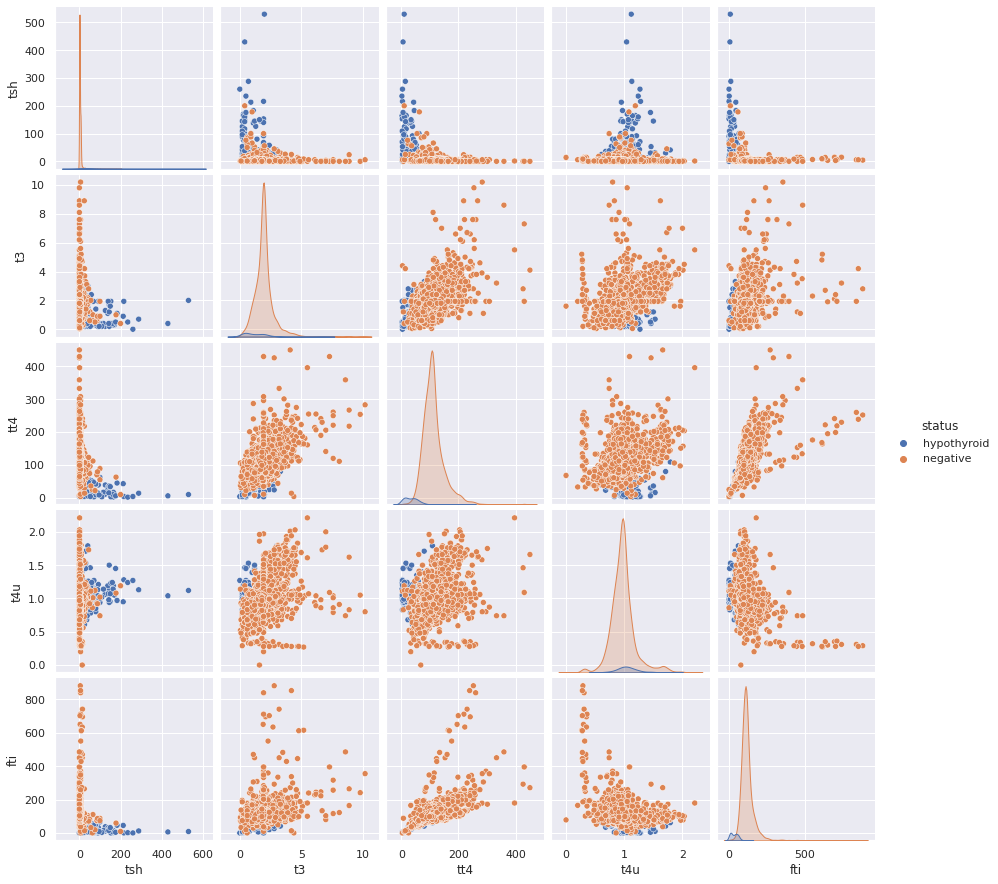

In [ ]:

# A pairplot
# Here we want visualize scatter plots of features with the argument 'hue' 
# to distinguish when the condition (hpyothyroidism) is negative or postive

measure_columns = ['tsh','t3','tt4','t4u','fti']

sns.pairplot(thyroid1, kind="scatter", diag_kind="kde", vars=measure_columns, hue="status")
plt.show()


The dataframe above shows 10 features that explain the most variance in the data.

In [ ]:
# Drop irrelevant columns
# The categorical variable TGB_measured gives information about whether there is a measurement in the # variable TGB, which was previously eliminated in the imputation phase, therefore # we proceed to eliminate that column TGB

thyroid.drop(['status','tbg'], 1, inplace=True)

## Random Forests

In [ ]:
## Random forest
# 

In [ ]:
#  Selecting our X and y
# 
## Step 1 : Decision Trees
# 

feat = thyroid.drop('sick_status' ,axis = 1)
feature_names = feat.columns
feature_names
X = thyroid[feature_names].to_numpy()
y = thyroid[ 'sick_status'].to_numpy()

In [ ]:
#np.isnan(thyroid.any()) #and gets False
np.isfinite(thyroid.all())

age                          True
sex                          True
on_thyroxine                 True
query_on_thyroxine           True
on_antithyroid_medication    True
thyroid_surgery              True
query_hypothyroid            True
query_hyperthyroid           True
pregnant                     True
sick                         True
tumor                        True
lithium                      True
goitre                       True
tsh_measured                 True
tsh                          True
t3_measured                  True
t3                           True
tt4_measured                 True
tt4                          True
t4u_measured                 True
t4u                          True
fti_measured                 True
fti                          True
tbg_measured                 True
sick_status                  True
dtype: bool

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


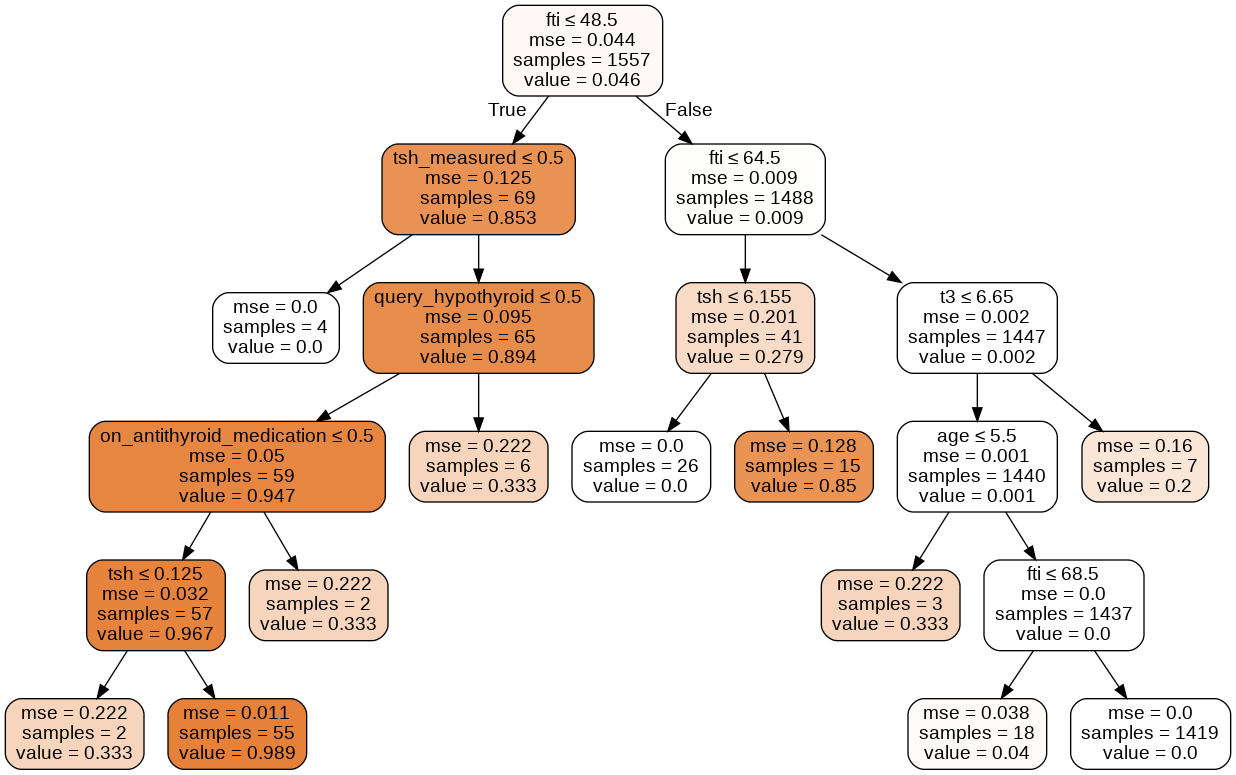

In [ ]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
# pick a specific tree from the forest
tree = forest.estimators_[50]

export_graphviz(tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_names)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('absenteism_forest.png')
Image(graph.create_png())


In [ ]:
# Get numerical feature importances
importances = list(tree.feature_importances_)

# We now use some Python magic to connect each feature with its importance
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_names, importances)]

print(feature_importances) #this already has all the information we need, but it can be tricky to see when there are too many features.
print()

# Nice to have: We can sort the values in descending order, since we care about the most important features first.
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];


[('age', 0.0), ('sex', 0.0), ('on_thyroxine', 0.0), ('query_on_thyroxine', 0.0), ('on_antithyroid_medication', 0.01), ('thyroid_surgery', 0.0), ('query_hypothyroid', 0.03), ('query_hyperthyroid', 0.0), ('pregnant', 0.0), ('sick', 0.0), ('tumor', 0.0), ('lithium', 0.0), ('goitre', 0.0), ('tsh_measured', 0.04), ('tsh', 0.11), ('t3_measured', 0.0), ('t3', 0.0), ('tt4_measured', 0.0), ('tt4', 0.0), ('t4u_measured', 0.0), ('t4u', 0.0), ('fti_measured', 0.0), ('fti', 0.8), ('tbg_measured', 0.0)]

Variable: fti                  Importance: 0.8
Variable: tsh                  Importance: 0.11
Variable: tsh_measured         Importance: 0.04
Variable: query_hypothyroid    Importance: 0.03
Variable: on_antithyroid_medication Importance: 0.01
Variable: age                  Importance: 0.0
Variable: sex                  Importance: 0.0
Variable: on_thyroxine         Importance: 0.0
Variable: query_on_thyroxine   Importance: 0.0
Variable: thyroid_surgery      Importance: 0.0
Variable: query_hyperthyr

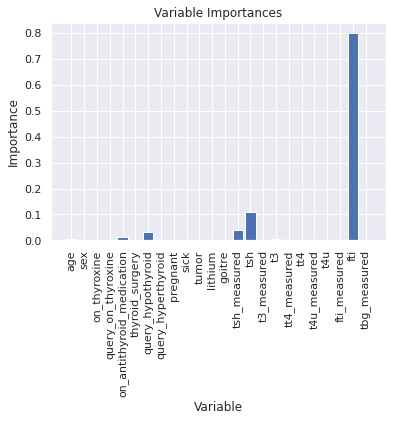

In [ ]:
# Import matplotlib for plotting and use magic command for Jupyter Notebooks
import matplotlib.pyplot as plt

# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, feature_names, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');


## Decision Trees

In [ ]:
## Step 1 : Decision Trees
# 

feat = thyroid.drop('sick_status' ,axis = 1)
feature_names = feat.columns
feature_names

Index(['age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'tsh_measured', 'tsh', 't3_measured', 't3', 'tt4_measured', 'tt4',
       't4u_measured', 't4u', 'fti_measured', 'fti', 'tbg_measured'],
      dtype='object')

In [ ]:
#  Selecting our X and y
# 

X = thyroid[feature_names ].to_numpy()
y = thyroid[ 'sick_status'].to_numpy()

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score


# Pre processing

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state =99)

# Fitting the model
tree = DecisionTreeClassifier()

tree.fit(X_train, y_train)

# Making predictions

y_pred = tree.predict(X_test)

y_pred_train = tree.predict(X_train)

# Checking the accuracy

print('Prediction accuracy:', accuracy_score(y_train, tree.predict(X_train)))
print('Test accuracy:', accuracy_score(y_test, y_pred))


Prediction accuracy: 0.9995948136142626
Test accuracy: 0.9854368932038835


In [ ]:
# Hyperparameter tuning using grid search

from sklearn.model_selection import GridSearchCV

param_grid = {'min_samples_split': [3,4,5,6],
              'max_depth': [3,4,5,6, 7, 8, 9, 10],
              'min_samples_leaf': [2,3,4,5]}

search = GridSearchCV(estimator = tree, param_grid = param_grid, cv = 10, scoring = 'accuracy')

In [ ]:
# Checking for the best parameters and accuracy score

search.fit(X_train, y_train)
print(search.best_params_)
print(search.best_score_)

{'max_depth': 3, 'min_samples_leaf': 3, 'min_samples_split': 3}
0.9935206214410321


In [ ]:
# Fitting the model with the new parameters
tree = DecisionTreeClassifier(max_depth=3, min_samples_leaf=2, min_samples_split=3)

tree.fit(X_train, y_train)

# Making predictions

y_pred = tree.predict(X_test)

y_pred_train = tree.predict(X_train)

# Checking the accuracy

print('Prediction accuracy:', accuracy_score(y_train, tree.predict(X_train)))
print('Test accuracy:', accuracy_score(y_test, y_pred))



Prediction accuracy: 0.9939222042139384
Test accuracy: 0.9902912621359223


In [ ]:
# Starting with adaboost

from sklearn.ensemble import AdaBoostClassifier

ada_boost = AdaBoostClassifier(DecisionTreeClassifier(max_depth=4, min_samples_leaf=2, min_samples_split=3), 
                          n_estimators=300, random_state=20)

ada_boost = ada_boost.fit(X_train, y_train)
y_pred = ada_boost.predict(X_test)

# Obtaining the accuracy score

print('Prediction accuracy:', accuracy_score(y_train, ada_boost.predict(X_train)))
print('Test accuracy:', accuracy_score(y_test, y_pred))

Prediction accuracy: 0.9995948136142626
Test accuracy: 0.9854368932038835


In [ ]:
#  Gradient Boosting
# 

from sklearn.ensemble import GradientBoostingClassifier
target_number_of_trees = 300

gbr = GradientBoostingClassifier(n_estimators=target_number_of_trees, learning_rate=0.4, max_depth=2)
gbr = gbr.fit(X_train, y_train)

y_pred = gbr.predict(X_test)

# Obtaining the accuracy

print('Prediction accuracy:', accuracy_score(y_train, gbr.predict(X_train)))
print('Test accuracy:', accuracy_score(y_test, y_pred))

Prediction accuracy: 0.997163695299838
Test accuracy: 0.9854368932038835


In [ ]:
# Hyper parameter tuning

param_grid = {'learning_rate': np.arange(0.1,1,0.1),
              'max_depth': [1,2,3,4,5]}

search = GridSearchCV(estimator = gbr, param_grid = param_grid, cv = 10, scoring = 'accuracy')

In [ ]:
# Getting the best parameters and best score

search.fit(X_train,y_train)
print(search.best_params_)
print(search.best_score_)

{'learning_rate': 0.4, 'max_depth': 4}
0.9910881801125704


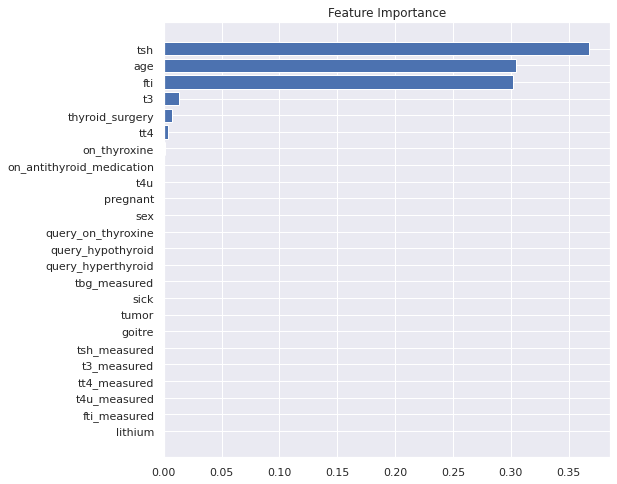

In [ ]:
# To show feature importance gradient boosting

from sklearn.inspection import permutation_importance
#
# Get Feature importance data using feature_importances_ attribute
#
feature_importance = gbr.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
fig = plt.figure(figsize=(8, 8))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, np.array(feature_names)[sorted_idx])
plt.title('Feature Importance')
result = permutation_importance(gbr, X_test, y_test, n_repeats=10,
                                random_state=42, n_jobs=2)
sorted_idx = result.importances_mean.argsort()
plt.show()

### The most important features are
tsh,age,fti,t3,thyroid surgery,tt4

## SVM 

In [ ]:
thyroid.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,tsh_measured,tsh,t3_measured,t3,tt4_measured,tt4,t4u_measured,t4u,fti_measured,fti,tbg_measured,sick_status
0,72.0,1.0,0,0,0,0,0,0,0,0,0,0,0,1,30.0,1,0.6,1,15.0,1,1.48,1,10.0,0,1
1,15.0,0.0,1,0,0,0,0,0,0,0,0,0,0,1,145.0,1,1.7,1,19.0,1,1.13,1,17.0,0,1
2,24.0,1.0,0,0,0,0,0,0,0,0,0,0,0,1,0.0,1,0.2,1,4.0,1,1.00,1,0.0,0,1
3,24.0,0.0,0,0,0,0,0,0,0,0,0,0,0,1,430.0,1,0.4,1,6.0,1,1.04,1,6.0,0,1
4,77.0,1.0,0,0,0,0,0,0,0,0,0,0,0,1,7.3,1,1.2,1,57.0,1,1.28,1,44.0,0,1


In [ ]:
import seaborn as sns; sns.set(font_scale=1.2)
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score

In [ ]:
# Removing the target column
w = thyroid.drop('sick_status', axis=1)
y = thyroid['sick_status']

# Applying the reduction algorithm: PCA
pca = PCA(n_components=2).fit(w)
X = pca.transform(w)
X.shape

(3086, 2)

In [ ]:
# Convert the data type for 'Class' column from object to category
y = y.astype('category')

# Convert each value in the 'Type' column into a number. This will be our target column
# y =y.cat.codes

#  Split the data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
# Building the model 
polyclassifier = SVC(kernel='poly',degree=3)
# Training the model using the training set
polyclassifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
# making prediction
y_pred = polyclassifier.predict(X_test)

In [ ]:
# Model Evaluation
print( accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.9838187702265372
[[591   2]
 [  8  17]]


98% accuracy


## rbf

In [ ]:
# Building the model 
rbfclassifier = SVC(C=1.0,kernel='rbf')

# Training the model using the training set
rbfclassifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
# making prediction
y_pred = rbfclassifier.predict(X_test)

In [ ]:
# Model Evaluation
print( accuracy_score(y_test, y_pred))
print("*"*100)
print(confusion_matrix(y_test, y_pred))

0.9854368932038835
****************************************************************************************************
[[591   2]
 [  7  18]]


# Sigmoid

In [ ]:
# Building the model 
sigclassifier = SVC(kernel='sigmoid')
# Training the model using the training set
sigclassifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='sigmoid',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
# making prediction
y_pred = sigclassifier.predict(X_test)

In [ ]:
# Model Evaluation
print( accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.959546925566343
[[593   0]
 [ 25   0]]


95% accuracy